# Plotly Tutorial

## Import

Source : https://www.youtube.com/watch?v=GGL6U0k8WYA

In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

# Definition

### Plotly

Plotly allows users to import, copy and paste, or stream data to be analyzed and visualized.  
For analysis and styling graphs, Plotly offers a Python sandbox (NumPy supported), datagrid, and GUI. Python scripts can be saved, shared, and collaboratively edited in Plotly. 

### Iplot

plot is interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots. They let you have a lot of control over how these plots look and they let you zoom, show information on hover and toggle data to be viewed on the chart.

### Cufflinks

Cufflinks is another library that connects the Pandas data frame with Plotly enabling users to create visualizations directly from Pandas.  
The library binds the power of Plotly with the flexibility of Pandas for easy plotting.

### Chart Studio

This package contains utilities for interfacing with Plotly's Chart Studio service (both Chart Studio cloud and Chart Studio On-Prem).

### Plotly.express (px)

plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX.  

Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures. 

Plotly Express provides more than 30 functions for creating different types of figures. 

## Basics

In [2]:
#Set up a basic random Dataset for figuration difference
arr1 = np.random.randn(50,4)
df1 = pd.DataFrame(arr1,columns=['A','B','C','D'])
df1.head()

,A,B,C,D
0,-0.733821,0.484678,0.785023,-0.379355
1,-0.202262,-1.671618,-0.610450,-0.606269
2,1.206021,0.359698,-0.504259,2.232854
3,1.289889,0.257343,-1.950003,-0.355811
4,0.566193,-0.129590,-1.628086,0.535715


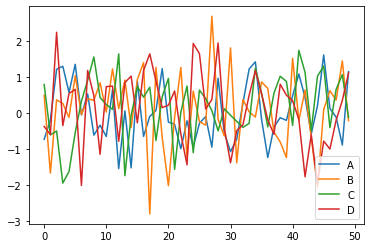

In [3]:
# Basic plot
df1.plot()

In [4]:
# iPlot
df1.iplot()

## Line Plots

In [5]:
# Importing additional features
import plotly.graph_objects as go

In [6]:
df_stocks = px.data.stocks() #mini dataset of some company stocks 

#Google stock evolution
px.line(df_stocks,x='date',y='GOOG',labels={'x':'Date','y':'Price'})

In [7]:
# Plotting 2 concurrent stocks side by side
px.line(df_stocks,x='date',y=['GOOG','AAPL'],labels={'x':'Date','y':'Price'}, title='Apple vs. Google')

In [8]:
fig = go.Figure()

# Apple stocks evolution
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,mode='lines',name='Apple',line=dict(color='silver')))

# Amazon stocks evolution
fig.add_trace(go.Scatter(x=df_stocks.date,y=df_stocks.AMZN,mode='lines+markers',name='Amazon',line=dict(color='orange')))

# Google stocks evolution
fig.add_trace(go.Scatter(x=df_stocks.date,y=df_stocks.GOOG, mode='lines',name='Google',line=dict(color='firebrick', width=2, dash='dashdot')))

# Plot title
fig.update_layout(title='Stock Price Data 2018 - 2020', xaxis_title='Price',yaxis_title='Date')

## Bar Charts

In [9]:
# evolution of US population throughout the years
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us, x='year', y='pop')

In [10]:
# tips by Sex
df_tips = px.data.tips()
px.bar(df_tips,x='day',y='tip',color='sex', barmode='group', title='Tips by Sex on Each Day',labels={'tip':'Tip Amount','day':'Day of the week'})
#barmode=group : bars side by side

In [23]:
#Countries with population > 2 million people
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")

fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')

# display the number in a more readable manner (outside over the bars shortened)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')



#pivot the text 45°
fig.update_layout(xaxis_tickangle=-45)

fig